In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r'C:\credit card\data\cdata.csv')

In [3]:
%matplotlib inline

In [4]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income,Card_Category,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,769000000.0,Existing Customer,45,1,3,4,2,75171,1,39,12691.0,777,11914.0,1144,42,0.061
1,819000000.0,Existing Customer,49,2,5,3,3,25686,1,44,8256.0,864,7392.0,1291,33,0.105
2,714000000.0,Existing Customer,51,1,3,3,2,109348,1,36,3418.0,0,3418.0,1887,20,0.000
3,770000000.0,Existing Customer,40,2,4,4,4,39617,1,34,3313.0,2517,796.0,1171,20,0.760
4,709000000.0,Existing Customer,40,1,3,6,2,61236,1,21,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772000000.0,Existing Customer,50,1,2,3,3,47737,1,40,4003.0,1851,2152.0,15476,117,0.462
10123,711000000.0,Attrited Customer,41,1,2,7,1,51542,1,25,4277.0,2186,2091.0,8764,69,0.511
10124,717000000.0,Attrited Customer,44,2,1,4,2,28850,1,36,5409.0,0,5409.0,10291,60,0.000
10125,717000000.0,Attrited Customer,30,1,2,3,4,59028,1,36,5281.0,0,5281.0,8395,62,0.000


In [5]:
df.rename(columns = {'Customer_Age' : 'Age', 'Dependent_count': 'Dependents', 
                     'Education_Level': 'Education'},
                      inplace = True)

In [6]:
df1 = df[['Age', 'Gender', 'Dependents', 'Education', 'Marital_Status', 'Income', 'Card_Category', 'Months_on_book', 'Credit_Limit', 'Avg_Utilization_Ratio']]

Text(0.5, 1.0, 'Correlation Matrix')

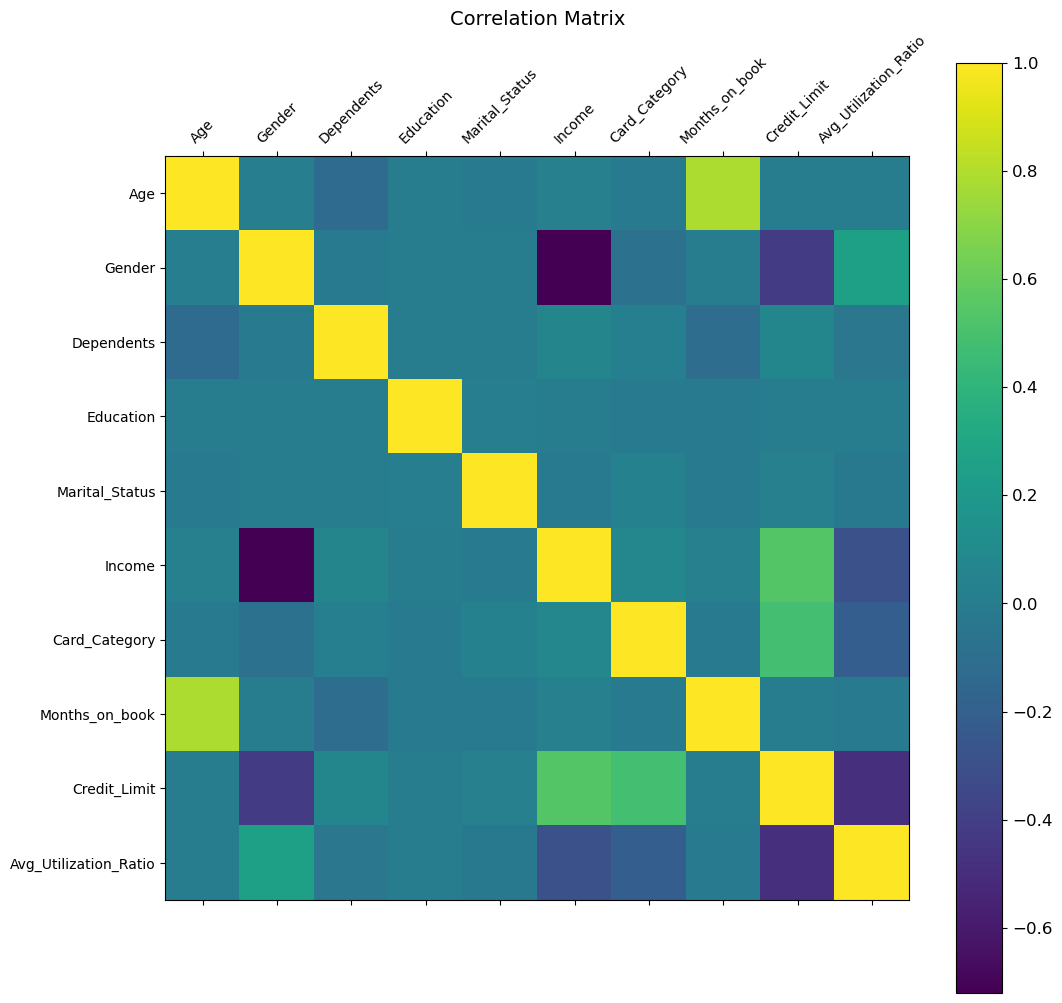

In [7]:
f = plt.figure(figsize=(12, 12)) 
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=10, rotation=45)
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12) 
plt.title('Correlation Matrix', fontsize=14) 

In [8]:
sub = df[['Age', 'Gender', 'Dependents', 'Education', 'Marital_Status', 'Income', 'Card_Category', 'Months_on_book', 'Credit_Limit', 'Avg_Utilization_Ratio']]

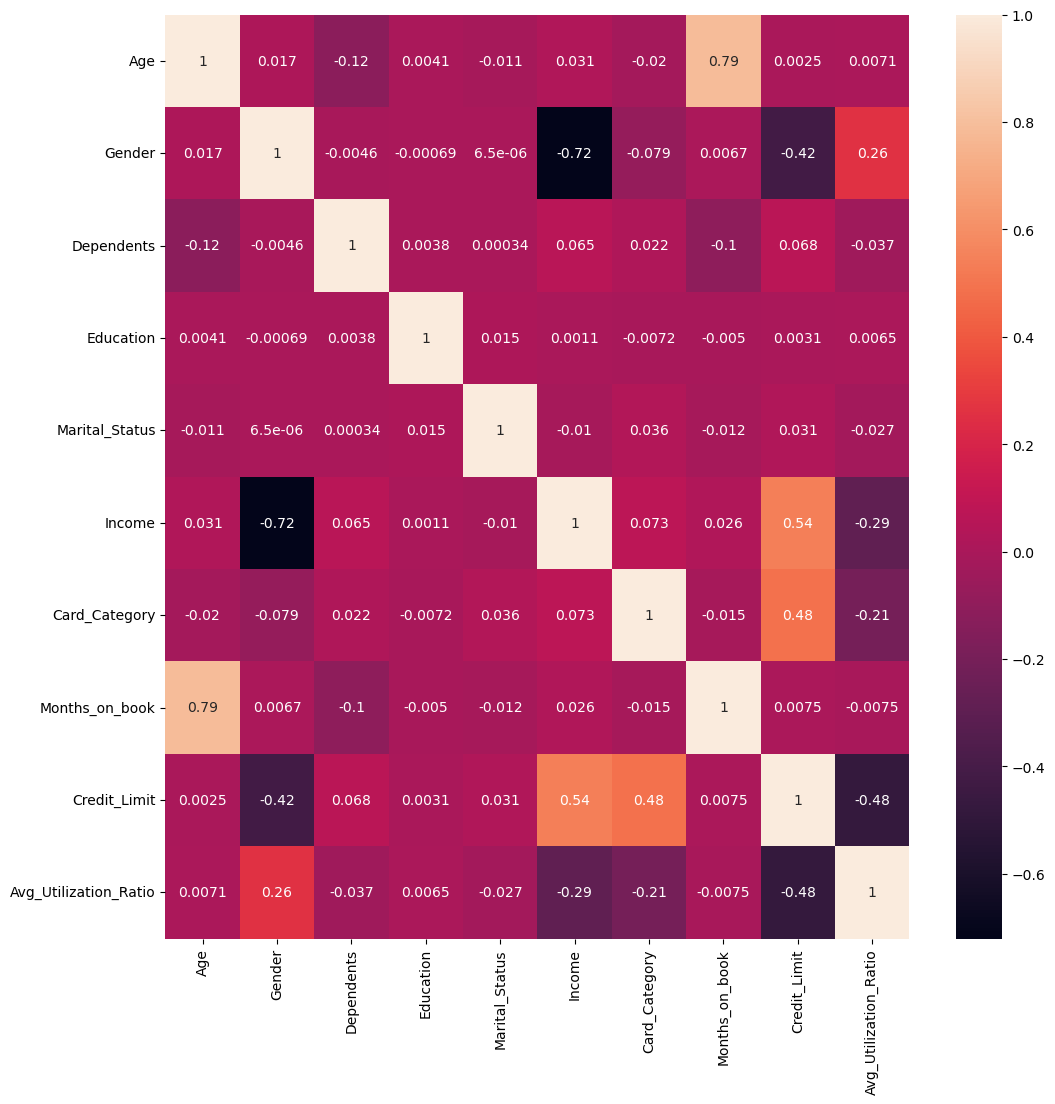

In [10]:
f,ax = plt.subplots(figsize=(12,12))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

In [11]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.95

In [12]:
vbig = df[dev]
small = df[~dev]

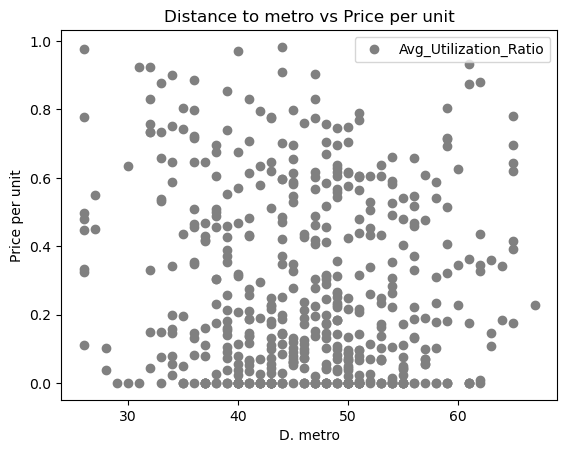

In [23]:
small.plot(x = 'Age', y='Avg_Utilization_Ratio',color = 'gray', style='o') 
plt.title('Distance to metro vs Price per unit')  
plt.xlabel('D. metro')  
plt.ylabel('Price per unit')  
plt.show()

In [15]:
X = small['Age'].values.reshape(-1,1)
y = small['Avg_Utilization_Ratio'].values.reshape(-1,1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=0)

In [17]:
regression = LinearRegression() 

In [18]:
regression.fit(X_train, y_train)

LinearRegression()

In [19]:
y_predicted = regression.predict(X_test)

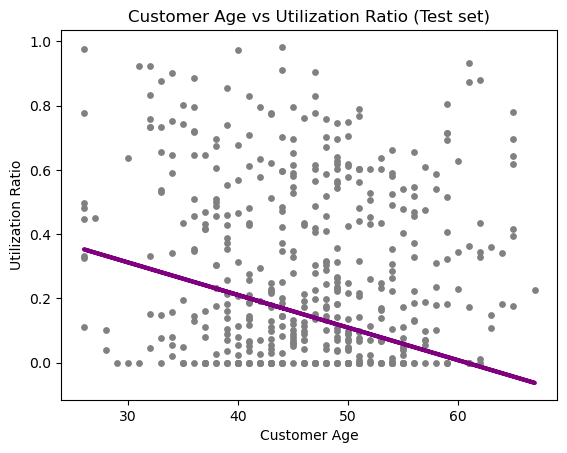

In [20]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='purple', linewidth =3)
plot_test.title('Customer Age vs Utilization Ratio (Test set)')
plot_test.xlabel('Customer Age')
plot_test.ylabel('Utilization Ratio')
plot_test.show()

In [24]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [25]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01014351]]
Mean squared error:  0.09306544092493768
R2 score:  -0.2815669768885858


In [26]:
y_predicted_train = regression.predict(X_train)

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01014351]]
Mean squared error:  0.028662421781936866
R2 score:  0.18560210805044197
